In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
url = "https://github.com/sambhaduri/Titanic-Survival-prediction-ML/raw/main/train.csv"
data = pd.read_csv(url)


In [28]:
# Explore the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: title={'center': 'PassengerId vs Age'}, xlabel='PassengerId', ylabel='Age'>

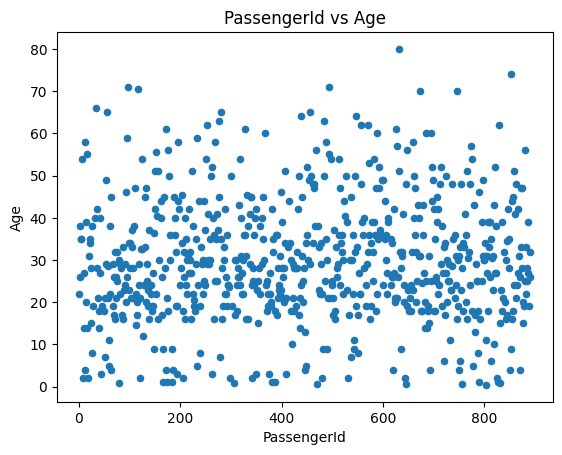

In [31]:
data.plot(x='PassengerId', y='Age', kind='scatter', title='PassengerId vs Age')

In [32]:
# Missing values handle in 'Age' column test with mean, median, mode and as checked median worked best as mean is impacted by outliers like 80 years old passenger
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isnull().sum()


/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1162/3494598109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# Convert 'Sex' to numeric (0 = male, 1 = female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Fill missing values in 'Embarked' and encode as numeric
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fill missing values in 'Cabin' and encode as the first letter (deck), then as numeric
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
data['Cabin'] = data['Cabin'].astype('category').cat.codes


/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1162/2316147036.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.339898  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.081163  0.114631   
Age             0.034212 -0.064910 -0.339898 -0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096688  0.159651   
Cabin          -0.030939 -0.301116  0.746616 -0.123076 -0.255783  0.041540   
Embarked       -0.030467  0.106811  0.045702  0.116569 -0.009165 -0.059961   

                Parch      Fare     Cabin  Embarked  
PassengerId -0.001652  0.012658 -0.030939 -0.030467  
Survived     0.081629  0.257307 -

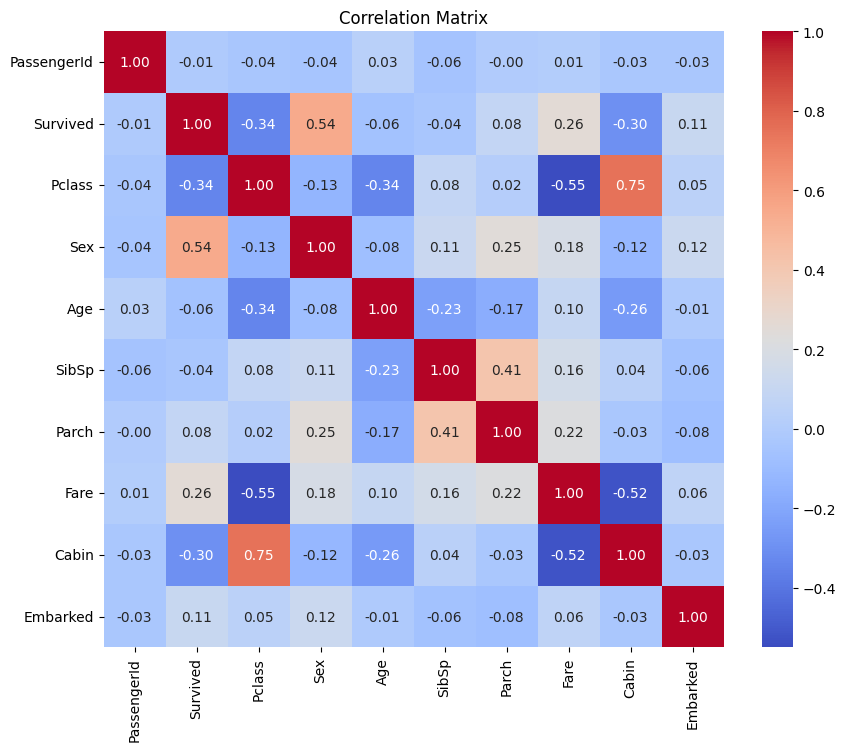

In [34]:
# Further data preprocessing and model training code would go here - correlation analysis

# Correlation matrix to check co-dependency between features
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [35]:
# Correlation of features with the target
corr_with_target = data.corr(numeric_only=True)['Survived'].sort_values(ascending=False)
print(corr_with_target)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Cabin         -0.301116
Pclass        -0.338481
Name: Survived, dtype: float64


In [60]:
# Based on correlation analysis, selecting features for the model
#selected_features = ['Pclass', 'Sex', 'Fare', 'Embarked', 'Cabin']
selected_features = ['Sex', 'Fare', 'Pclass']
X = data[selected_features]
y = data['Survived']


In [61]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9087078651685393
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [63]:
# Use the model to make predictions on new data

test_url = "https://github.com/sambhaduri/Titanic-Survival-prediction-ML/raw/main/test.csv"
test_data = pd.read_csv(test_url)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [65]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Preprocess the test data similarly
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
test_data.isnull().sum()

/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1162/2291316494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(test_data["Age"].median(), inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
# Convert 'Sex' to numeric (0 = male, 1 = female)
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})


In [70]:
# update test data preprocessing as per selected features
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
X_new = test_data[selected_features]
predictions = model.predict(X_new)


/var/folders/5d/xxtbbnhj10zgpnbm6xw_26g00000gn/T/ipykernel_1162/1605900395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
